In [161]:
import pandas as pd
import random
import dask.dataframe as dd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn.manifold import TSNE

In [162]:
pd.options.plotting.backend = "plotly"

In [163]:
# Laod the features
feat_df = dd.read_csv("../data/1000_15_2021_features_3.csv").compute()
feat_df.head()

,id,year_month,load_mean,load_std,load_min,load_max,load_daily_mean_std,load_weekday_0_mean,load_weekday_0_std,load_weekday_1_mean,...,count_outliers_high,count_outliers_low,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3
0,0057bc119b36b4d0dcfef05e3f60163e,2021-01,0.184362,0.760767,0.347143,7.789030,0.160007,0.892892,0.667940,1.023449,...,42.0,35.0,7.050730,12.585196,-11.554958,-10.121217,4.546989,-15.588981,14.557451,-0.533628
1,0057bc119b36b4d0dcfef05e3f60163e,2021-02,0.180484,0.736772,0.365684,6.432713,0.180156,1.018296,0.702099,1.056715,...,27.0,35.0,9.240581,0.753598,-4.580644,0.577361,12.543537,-0.462163,4.420297,-16.840569
2,0057bc119b36b4d0dcfef05e3f60163e,2021-03,0.164052,0.730755,0.390121,5.723808,0.132283,0.967543,0.724380,1.112090,...,38.0,33.0,8.331800,-5.526264,-1.779780,-4.932122,2.736141,-0.228069,2.818589,8.047970
3,0057bc119b36b4d0dcfef05e3f60163e,2021-04,0.163328,0.726846,0.391850,5.957351,0.139459,0.964529,0.752873,1.171416,...,47.0,33.0,-1.471693,9.671637,5.979890,9.927336,5.950096,2.105975,11.946732,-0.198124
4,0094af6aa5e6e288830c31902c662df7,2021-01,0.018490,0.672532,0.000000,2.163347,0.309863,0.938678,0.629583,0.947524,...,39.0,86.0,25.054365,5.191094,12.971921,-13.654313,19.535120,-12.726646,27.621145,1.784444


In [164]:
feat_df.sort_values("id", inplace=True)

In [165]:
# apply the clustering
monthly_features_df = feat_df
n_clusters = 7

monthly_features_df["cluster"] = -1
Xs_scaled = []
indices = []
labels = []

monthly_features_df["x"] = np.nan
monthly_features_df["y"] = np.nan

for year_month in monthly_features_df["year_month"].unique():
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(monthly_features_df.loc[monthly_features_df["year_month"] == year_month].drop(columns=["id", "year_month"]))

    reducer = TSNE(n_components=2, random_state=42)
    X_scaled = np.nan_to_num(X_scaled)
    embedding = reducer.fit_transform(X_scaled)
    monthly_features_df.loc[monthly_features_df["year_month"] == year_month, "x"] = embedding[:, 0]
    monthly_features_df.loc[monthly_features_df["year_month"] == year_month, "y"] = embedding[:, 1]

    kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, random_state=42)
    kmeans.fit(embedding)

    Xs_scaled.append(X_scaled)
    indices.append(monthly_features_df.loc[monthly_features_df["year_month"] == year_month].index)
    monthly_features_df.loc[monthly_features_df["year_month"] == year_month, "cluster"] = kmeans.labels_

X_scaled = np.zeros((len(monthly_features_df), Xs_scaled[0].shape[1]))
for i, index in enumerate(indices):
    X_scaled[index] = Xs_scaled[i]

monthly_features_df.head()

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning:

All-NaN slice encountered

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning:

All-NaN slice encountered

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning:

All-NaN slice encountered

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning:

All-NaN slice encountered

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning:

All-NaN slice encountered

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning:

All-NaN slice encountered

c:\Users\swiss_sdi\anaconda3\envs\hackdays-2024\lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning:

All-NaN slice encountered


,id,year_month,load_mean,load_std,load_min,load_max,load_daily_mean_std,load_weekday_0_mean,load_weekday_0_std,load_weekday_1_mean,...,y_0,x_1,y_1,x_2,y_2,x_3,y_3,cluster,x,y
0,0057bc119b36b4d0dcfef05e3f60163e,2021-01,0.184362,0.760767,0.347143,7.789030,0.160007,0.892892,0.667940,1.023449,...,12.585196,-11.554958,-10.121217,4.546989,-15.588981,14.557451,-0.533628,3,7.346645,13.375811
1,0057bc119b36b4d0dcfef05e3f60163e,2021-02,0.180484,0.736772,0.365684,6.432713,0.180156,1.018296,0.702099,1.056715,...,0.753598,-4.580644,0.577361,12.543537,-0.462163,4.420297,-16.840569,3,8.417091,-20.021376
2,0057bc119b36b4d0dcfef05e3f60163e,2021-03,0.164052,0.730755,0.390121,5.723808,0.132283,0.967543,0.724380,1.112090,...,-5.526264,-1.779780,-4.932122,2.736141,-0.228069,2.818589,8.047970,0,12.087504,-2.865773
3,0057bc119b36b4d0dcfef05e3f60163e,2021-04,0.163328,0.726846,0.391850,5.957351,0.139459,0.964529,0.752873,1.171416,...,9.671637,5.979890,9.927336,5.950096,2.105975,11.946732,-0.198124,2,17.087536,15.430813
4,0094af6aa5e6e288830c31902c662df7,2021-01,0.018490,0.672532,0.000000,2.163347,0.309863,0.938678,0.629583,0.947524,...,5.191094,12.971921,-13.654313,19.535120,-12.726646,27.621145,1.784444,1,-7.952633,26.870245


In [166]:
# monthly_features_df["x"] = np.nan
# monthly_features_df["y"] = np.nan
# for year_month in monthly_features_df["year_month"].unique():
#     reducer = TSNE(n_components=2, random_state=42)
#     embedding = reducer.fit_transform(X_scaled[monthly_features_df["year_month"] == year_month])
#     monthly_features_df.loc[monthly_features_df["year_month"] == year_month, "x"] = embedding[:, 0]
#     monthly_features_df.loc[monthly_features_df["year_month"] == year_month, "y"] = embedding[:, 1]

In [167]:
init_map = {}
init_year_month = "2021-01"
for cluster in range(n_clusters):
    init_map[cluster] = monthly_features_df.loc[(monthly_features_df["cluster"] == cluster) & (monthly_features_df["year_month"] == init_year_month), "id"].unique().tolist()

clusters_mapping = {init_year_month: {i: i for i in range(n_clusters)}}
for year_month in monthly_features_df["year_month"].unique():
    if year_month == init_year_month:
        continue
    cluster_map = {}
    for cluster in range(n_clusters):
        cluster_map[cluster] = monthly_features_df.loc[(monthly_features_df["cluster"] == cluster) & (monthly_features_df["year_month"] == year_month), "id"].unique().tolist()
    n_common = {}
    for cluster1 in range(n_clusters):
        for cluster2 in range(n_clusters):
            n_common[(cluster1, cluster2)] = len(set(cluster_map[cluster1]).intersection(set(init_map[cluster2]))) / len(set(init_map[cluster2]))
    n_common = {k: v for k, v in sorted(n_common.items(), key=lambda item: item[1], reverse=True)}
    cluster_mapping = {}
    for cluster1, cluster2 in n_common:
        if cluster1 not in cluster_mapping and cluster2 not in cluster_mapping.values():
            cluster_mapping[cluster1] = cluster2
    clusters_mapping[year_month] = cluster_mapping


monthly_features_df["cluster"] = monthly_features_df.apply(lambda x: clusters_mapping[x["year_month"]][x["cluster"]], axis=1)

In [168]:
monthly_features_df.sort_values("id", inplace=True)

In [169]:
for month in range(1, 5):
    year_month = f"2021-{month:02d}"
    fig = monthly_features_df.loc[monthly_features_df["year_month"] == year_month].plot.scatter(x="x", y="y", color=monthly_features_df.loc[monthly_features_df["year_month"] == year_month, "cluster"].astype(str))
    fig.update_layout(width=800, height=800, title=f"Clustering of {year_month}")
    fig.show()

In [ ]:
assert False

In [170]:
fig = monthly_features_df.plot.scatter(x="x", y="y", color=monthly_features_df["cluster"].astype(str), animation_frame="year_month", animation_group="id")
fig.update_layout(width=800, height=800, title=f"Clustering of {year_month}", yaxis=dict(range=[-60, 60]), xaxis=dict(range=[-60, 60]), transition = {'duration': 1000000})
fig.show()

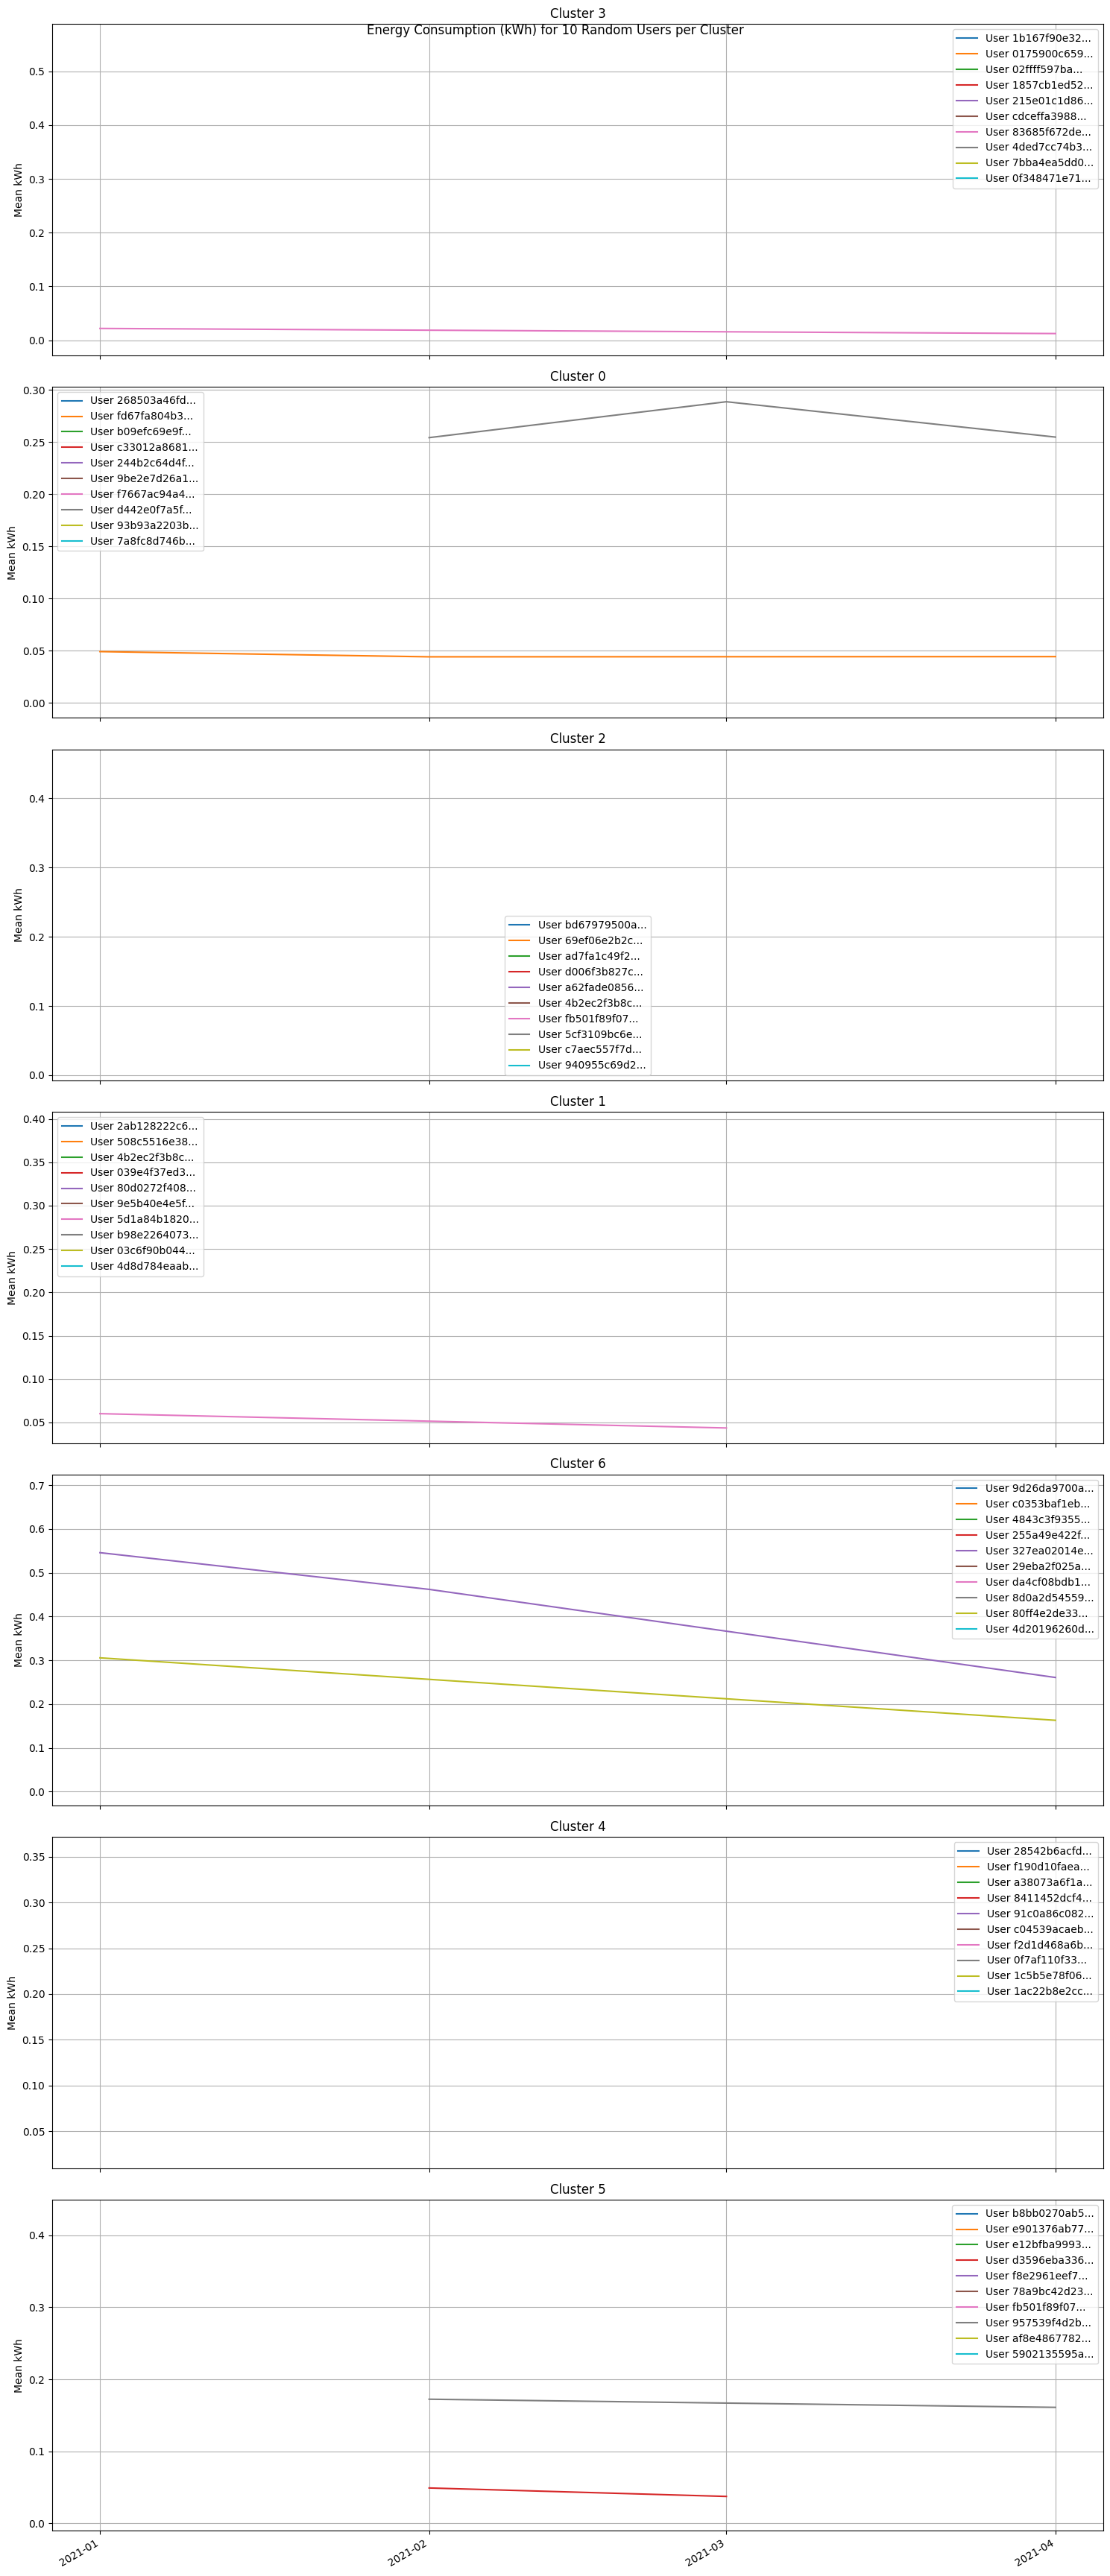

In [154]:
first_x_users_in_cluster_to_display = 10

df = monthly_features_df
df["year_month"] = pd.to_datetime(df["year_month"])

df["cluster"] = df["cluster"].astype(int)
clusters = df["cluster"].unique()

# Set up the plot
fig, axes = plt.subplots(len(clusters), 1, figsize=(15, 5 * len(clusters)), sharex=True)
fig.suptitle(
    f"Energy Consumption (kWh) for {first_x_users_in_cluster_to_display} Random Users per Cluster"
)

if len(clusters) == 1:
    axes = [axes]

for idx, cluster in enumerate(clusters):
    # Filter data for the current cluster
    cluster_data = df[df["cluster"] == cluster]

    # Get X random user IDs from this cluster
    random_users = np.random.choice(
        cluster_data["id"].unique(),
        min(first_x_users_in_cluster_to_display, len(cluster_data["id"].unique())),
        replace=False,
    )

    # Plot data for each random user
    for user in random_users:
        user_data = cluster_data[cluster_data["id"] == user]
        user_data = user_data.sort_values("year_month")
        axes[idx].plot(
            user_data["year_month"],
            user_data["load_mean"],
            label=f"User {user[:first_x_users_in_cluster_to_display+1]}...",
        )

    axes[idx].set_title(f"Cluster {cluster}")
    axes[idx].set_ylabel("Mean kWh")
    axes[idx].legend()
    axes[idx].grid(True)

# Format x-axis to show months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

plt.tight_layout()
plt.show()